In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("data/Ratings.csv")
users = pd.read_csv("data/Users.csv")
books = pd.read_csv("data/Books.csv",low_memory=False)

In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
books.duplicated().sum()

np.int64(0)

In [10]:
ratings.duplicated().sum()

np.int64(0)

In [11]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [12]:
df = ratings.merge(books,on='ISBN')

In [13]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


## Popularity Based

In [14]:
num_rating = df.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating':'total-count'}, inplace = True)
num_rating

,Book-Title,total-count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [15]:
avg_rating = df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating.rename(columns={'Book-Rating': 'avg-rating'}, inplace=True)
avg_rating

,Book-Title,avg-rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [16]:
popular = num_rating.merge(avg_rating,on='Book-Title')
popular

,Book-Title,total-count,avg-rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [17]:
popular['total-count'].describe()

count    241071.000000
mean          4.277312
std          16.738685
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: total-count, dtype: float64

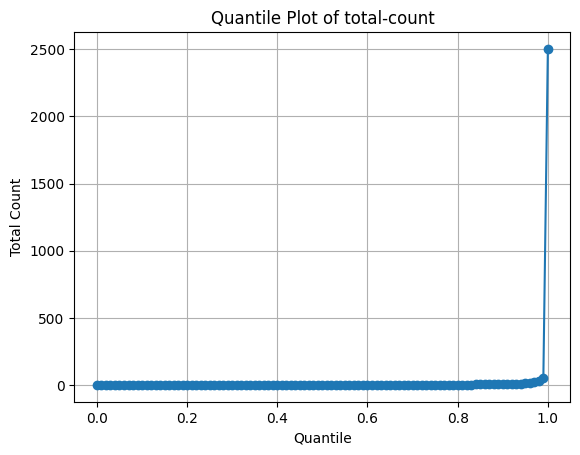

In [18]:
quantiles = np.arange(0, 1.01, 0.01)
quantile_values = popular['total-count'].quantile(quantiles)

plt.plot(quantiles, quantile_values, marker='o', linestyle='-')
plt.xlabel('Quantile')
plt.ylabel('Total Count')
plt.title('Quantile Plot of total-count')
plt.grid()
plt.show()

In [19]:
popular['total-count'].quantile(np.arange(.9, 1, .01))

0.90     7.0
0.91     8.0
0.92     9.0
0.93    10.0
0.94    11.0
0.95    13.0
0.96    16.0
0.97    20.0
0.98    29.0
0.99    50.0
Name: total-count, dtype: float64

In [20]:
# 1% of books received >= 50 ratings. so consier top 1%.

In [21]:
popular = popular[popular['total-count'] >= 50].sort_values('avg-rating',ascending = False)

In [22]:
popular

,Book-Title,total-count,avg-rating
70396,Free,56,8.017857
208575,The Stand (The Complete and Uncut Edition),57,6.175439
77812,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
...,...,...,...
234951,Wild Animus,2502,1.019584
233563,Whirlwind,61,1.000000
6186,A Secret Affair,50,1.000000
165814,Ssn,67,0.970149


In [23]:
popular_df = popular.merge(df ,on="Book-Title").drop_duplicates('Book-Title')
popular_df

,Book-Title,total-count,avg-rating,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Free,56,8.017857,2345,1844262553,9,Paul Vincent,2003,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...
56,The Stand (The Complete and Uncut Edition),57,6.175439,2759,0385199570,10,Stephen King,1990,Doubleday Books,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...
113,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667,277427,0877017883,0,Nick Bantock,1991,Chronicle Books,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...
185,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,277427,0439136369,0,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
613,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,278356,0439139600,10,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
285992,Wild Animus,2502,1.019584,276925,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
288494,Whirlwind,61,1.000000,10030,0688066631,0,Clavell,1986,Harpercollins,http://images.amazon.com/images/P/0688066631.0...,http://images.amazon.com/images/P/0688066631.0...,http://images.amazon.com/images/P/0688066631.0...
288555,A Secret Affair,50,1.000000,1838,0061012289,9,Barbara Taylor Bradford,1997,HarperTorch,http://images.amazon.com/images/P/0061012289.0...,http://images.amazon.com/images/P/0061012289.0...,http://images.amazon.com/images/P/0061012289.0...
288605,Ssn,67,0.970149,278418,0425173534,0,Tom Clancy,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425173534.0...,http://images.amazon.com/images/P/0425173534.0...,http://images.amazon.com/images/P/0425173534.0...


In [24]:
popular_df = popular_df[['Book-Title','Book-Author','total-count','avg-rating','Image-URL-S']]

In [25]:
popular_df.head()

,Book-Title,Book-Author,total-count,avg-rating,Image-URL-S
0,Free,Paul Vincent,56,8.017857,http://images.amazon.com/images/P/1844262553.0...
56,The Stand (The Complete and Uncut Edition),Stephen King,57,6.175439,http://images.amazon.com/images/P/0385199570.0...
113,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,72,6.041667,http://images.amazon.com/images/P/0877017883.0...
185,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136369.0...
613,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139600.0...


# Collaborative Filtering
 Memory Based : Item Based

In [26]:
# finding experienced users
user_rating_counts = ratings.groupby('User-ID')['Book-Rating'].count()
user_rating_counts.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: Book-Rating, dtype: float64

In [27]:
user_rating_counts.quantile(np.arange(.9, 1, .01))

0.90     12.0
0.91     14.0
0.92     16.0
0.93     19.0
0.94     24.0
0.95     29.0
0.96     39.0
0.97     55.0
0.98     85.0
0.99    174.0
Name: Book-Rating, dtype: float64

In [28]:
# we will consider top 175 users as experienced users

In [29]:
filt = df.groupby('User-ID').count()['Book-Rating'] > 175
exp_users = filt[filt].index
exp_users

Index([   254,   2033,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
         6323,
       ...
       274301, 274308, 274808, 275970, 276680, 277427, 277478, 277639, 278188,
       278418],
      dtype='int64', name='User-ID', length=949)

In [30]:
users_df = df[df['User-ID'].isin(exp_users)]

In [31]:
# books that are rated by more than 50 ppl
filt = df.groupby('Book-Title').count()['Book-Rating'] > 50
most_rated = filt[filt].index
most_rated

Index(['10 Lb. Penalty', '16 Lighthouse Road', '1984', '1st to Die: A Novel',
       '2010: Odyssey Two', '204 Rosewood Lane', '2061: Odyssey Three',
       '24 Hours', '2nd Chance', '3rd Degree',
       ...
       'YOU BELONG TO ME', 'Year of Wonders', 'You Belong To Me',
       'You Shall Know Our Velocity', 'Young Wives',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"',
       '\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"',
       'stardust'],
      dtype='object', name='Book-Title', length=2381)

In [32]:
items_df = df[df['Book-Title'].isin(most_rated)]

In [33]:
items_df.duplicated().sum()

np.int64(0)

In [34]:
pt = pt = users_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt

User-ID,254,2033,2276,2766,2977,3363,4017,4385,6251,6323,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Always Have Popsicles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple Magic (The Collector's series),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beyond IBM: Leadership Marketing and Finance for the 1990s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã?Â?ber das Fernsehen.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ã?Â?lpiraten.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
user_mean = pt.mean(axis=1)
df_normalized = pt.sub(user_mean,axis=0)
df_filled = df_normalized.fillna(0)
df_filled

User-ID,254,2033,2276,2766,2977,3363,4017,4385,6251,6323,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always Have Popsicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple Magic (The Collector's series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ã?Â?ber das Fernsehen.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ã?Â?lpiraten.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_filled)

NearestNeighbors(algorithm='brute', metric='cosine')

In [37]:
query_index = 0
distances, indices = model_knn.kneighbors([df_filled.iloc[query_index]], n_neighbors=6)

print(f"Recommendations for {df_filled.index[query_index]}:\n")

for i in range(1, len(indices.flatten())):
    print(f"{i}: {df_filled.index[indices.flatten()[i]]}, distance: {distances.flatten()[i]}")

Recommendations for  A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America):

1: Baby Sitters Club #03: The Truth about Stacey (Baby-Sitters Club (Paperback)), distance: 0.1339745962155614
2: Mary Anne and Miss Priss (Baby-Sitters Club (Paperback)), distance: 0.16666666666666652
3: The Great Railroad Race: The Diary of Libby West (Dear America), distance: 0.16666666666666663
4: The Case of the Volcano Mystery: A Novelization (Adventures of Mary-Kate &amp; Ashley, No 8), distance: 0.17504208861569448
5: Mary Anne's Bad-Luck Mystery (Baby-Sitters Club, 17), distance: 0.1784161637422509


## User-Based

In [38]:
df_filled_user = df_filled.T
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_filled_user)

NearestNeighbors(algorithm='brute', metric='cosine')

In [39]:
user_index = 0

# Find nearest neighbors (similar users)
distances, indices = model_knn.kneighbors(df_filled_user.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6)

# Get the actual user ID
user_id = df_filled_user.index[user_index]

# Display similar users
print(f"Users similar to {user_id}:\n")
for i in range(1, len(indices.flatten())):  # Skip the first one (self)
    print(f"{i}: {df_filled_user.index[indices.flatten()[i]]}, Similarity: {1 - distances.flatten()[i]:.4f}")


C:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Users similar to 254:

1: 66942, Similarity: 0.0772
2: 12824, Similarity: 0.0508
3: 231237, Similarity: 0.0496
4: 136205, Similarity: 0.0487
5: 73681, Similarity: 0.0471


In [40]:
# similar users
similar_users = indices.flatten()[1:]

# books rated by similar users
recommended_books = df_filled_user.iloc[similar_users].mean(axis=0).sort_values(ascending=False).index

print(f"\nTop 5 Recommended books for User {user_id}:\n")
for i in recommended_books[:5]:
    print(i + "\n")



Top 5 Recommended books for User 254:

The Secret Life of Bees

The Hot Zone

Harry Potter and the Prisoner of Azkaban (Book 3)

Harry Potter and the Chamber of Secrets (Book 2)

Neverwhere



## Model Based

In [41]:
from scipy.sparse.linalg import svds

In [42]:
from sklearn.metrics import mean_squared_error
df_matrix = df_filled_user.to_numpy(dtype=np.float64)  

def evaluate_k(k_value):
    # Perform SVD
    U, sigma, Vt = svds(df_matrix, k=k_value)
    sigma = np.diag(sigma)

    # Reconstruct the predicted ratings matrix
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Compute MSE (no need for .to_numpy())
    mse = mean_squared_error(df_matrix, predicted_ratings)
    return np.sqrt(mse)  # Return RMSE instead of MSE

# Try different values of k
for k in [10,20,30,40,50]:
    print(f"k={k}, RMSE={evaluate_k(k):.4f}")  # Print RMSE


k=10, RMSE=0.1469
k=20, RMSE=0.1432
k=30, RMSE=0.1402
k=40, RMSE=0.1374
k=50, RMSE=0.1349


In [43]:
# Convert DataFrame to NumPy array (ensure it's numeric)
df_matrix = df_filled_user.to_numpy(dtype=np.float64)  

# Perform SVD
U, sigma, Vt = svds(df_matrix, k=50)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the predicted ratings matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert back to DataFrame with original index & columns
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=df_filled_user.index, columns=df_filled_user.columns)


In [44]:
user_id = 254  # Replace with a real User-ID

# Get user's predicted ratings
user_ratings = predicted_ratings_df.loc[user_id]

# Sort books by highest predicted rating
recommended_books = user_ratings.sort_values(ascending=False).index

print(f"Recommended books for User {user_id}:\n", list(recommended_books[:5]))  # Top 5 recommendations

Recommended books for User 254:
 ['Harry Potter and the Chamber of Secrets (Book 2)', 'Harry Potter and the Prisoner of Azkaban (Book 3)', "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'Harry Potter and the Goblet of Fire (Book 4)', "Harry Potter and the Sorcerer's Stone (Book 1)"]


In [46]:
import pickle 
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(df_filled,open('df_filled.pkl','wb'))

In [47]:
df_filled.to_csv("df_filled.csv", index=True)